# Laboratory 4

Similarity Based Learning for Classification and Recommender System

In [1]:
# IMPORT YOUR REQUIRED LIBRARIES HERE

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from ucimlrepo import fetch_ucirepo 
from matplotlib.colors import LinearSegmentedColormap

For Q1 to Q6, you may choose from any of the available dataset from UCI. 

https://archive.ics.uci.edu/datasets?Task=Classification&skip=0&take=10&sort=desc&orderBy=NumHits&search=

### Question 0

Perform any data cleaning methodologies if your chosen dataset is not clean.

In [2]:
# shrooms.to_csv("mushrooms.csv", index=False)
shrooms = pd.read_csv("mushrooms.csv")
shrooms.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [3]:
missing_values = shrooms.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64


In [4]:
most_common_value = shrooms["stalk-root"].mode()[0]
shrooms["stalk-root"] = shrooms["stalk-root"].fillna(most_common_value)

In [5]:
# create mapping dictionaties

descriptions = {
    
    "poisonous": {
        "p": "poisonous",
        "e": "edible"
    },
    "cap-shape": {
        "b": "bell",
        "c": "conical",
        "x": "convex",
        "f": "flat",
        "k": "knobbed",
        "s": "sunken"
    },
    "cap-surface": {
        "f": "fibrous",
        "g": "grooves",
        "y": "scaly",
        "s": "smooth"
    },
    "cap-color": {
        "n": "brown",
        "b": "buff",
        "c": "cinnamon",
        "g": "gray",
        "r": "green",
        "p": "pink",
        "u": "purple",
        "e": "red",
        "w": "white",
        "y": "yellow"
    },
    "bruises": {
        "t": "bruises",
        "f": "no"
    },
    "odor": {
        "a": "almond",
        "l": "anise",
        "c": "creosote",
        "y": "fishy",
        "f": "foul",
        "m": "musty",
        "n": "none",
        "p": "pungent",
        "s": "spicy"
    },
    "gill-attachment": {
        "a": "attached",
        "d": "descending",
        "f": "free",
        "n": "notched"
    },
    "gill-spacing": {
        "c": "close",
        "w": "crowded",
        "d": "distant"
    },
    "gill-size": {
        "b": "broad",
        "n": "narrow"
    },
    "gill-color": {
        "k": "black",
        "n": "brown",
        "b": "buff",
        "h": "chocolate",
        "g": "gray",
        "r": "green",
        "o": "orange",
        "p": "pink",
        "u": "purple",
        "e": "red",
        "w": "white",
        "y": "yellow"
    },
    "stalk-shape": {
        "e": "enlarging",
        "t": "tapering"
    },
    "stalk-root": {
        "b": "bulbous",
        "c": "club",
        "u": "cup",
        "e": "equal",
        "z": "rhizomorphs",
        "r": "rooted",
    },
    "stalk-surface-above-ring": {
        "f": "fibrous",
        "y": "scaly",
        "k": "silky",
        "s": "smooth"
    },
    "stalk-surface-below-ring": {
        "f": "fibrous",
        "y": "scaly",
        "k": "silky",
        "s": "smooth"
    },
    "stalk-color-above-ring": {
        "n": "brown",
        "b": "buff",
        "c": "cinnamon",
        "g": "gray",
        "o": "orange",
        "p": "pink",
        "e": "red",
        "w": "white",
        "y": "yellow"
    },
    "stalk-color-below-ring": {
        "n": "brown",
        "b": "buff",
        "c": "cinnamon",
        "g": "gray",
        "o": "orange",
        "p": "pink",
        "e": "red",
        "w": "white",
        "y": "yellow"
    },
    "veil-type": {
        "p": "partial",
        "u": "universal"
    },
    "veil-color": {
        "n": "brown",
        "o": "orange",
        "w": "white",
        "y": "yellow"
    },
    "ring-number": {
        "n": "none",
        "o": "one",
        "t": "two"
    },
    "ring-type": {
        "c": "cobwebby",
        "e": "evanescent",
        "f": "flaring",
        "l": "large",
        "n": "none",
        "p": "pendant",
        "s": "sheathing",
        "z": "zone"
    },
    "spore-print-color": {
        "k": "black",
        "n": "brown",
        "b": "buff",
        "h": "chocolate",
        "r": "green",
        "o": "orange",
        "u": "purple",
        "w": "white",
        "y": "yellow"
    },
    "population": {
        "a": "abundant",
        "c": "clustered",
        "n": "numerous",
        "s": "scattered",
        "v": "several",
        "y": "solitary"
    },
    "habitat": {
        "g": "grasses",
        "l": "leaves",
        "m": "meadows",
        "p": "paths",
        "u": "urban",
        "w": "waste",
        "d": "woods"
    }
}

In [6]:
for col, mapping in descriptions.items():
    if col in shrooms.columns:
        shrooms[col] = shrooms[col].map(mapping)

shrooms

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,poisonous
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,grasses,edible
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,meadows,edible
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,poisonous
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,white,white,partial,white,one,evanescent,brown,abundant,grasses,edible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,knobbed,smooth,brown,no,none,attached,close,broad,yellow,enlarging,...,orange,orange,partial,orange,one,pendant,buff,clustered,leaves,edible
8120,convex,smooth,brown,no,none,attached,close,broad,yellow,enlarging,...,orange,orange,partial,brown,one,pendant,buff,several,leaves,edible
8121,flat,smooth,brown,no,none,attached,close,broad,brown,enlarging,...,orange,orange,partial,orange,one,pendant,buff,clustered,leaves,edible
8122,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,tapering,...,white,white,partial,white,one,evanescent,white,several,leaves,poisonous


### Question 1

Load the dataset and display the first 5 rows. Perform any data cleaning at this point, if necessary.

In [7]:
# INSERT CODE HERE
shrooms.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,poisonous
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,grasses,edible
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,meadows,edible
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,poisonous
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,white,white,partial,white,one,evanescent,brown,abundant,grasses,edible


### Question 2

Show the distribution of the class. What can you say about the distribution of data? Calculate also the proportional chance criterion.

Class Distribution:
poisonous
edible       4208
poisonous    3916
Name: count, dtype: int64

Class Proportions:
poisonous
edible       0.517971
poisonous    0.482029
Name: count, dtype: float64

Proportional Chance Criterion (PCC): 0.5006459455010605


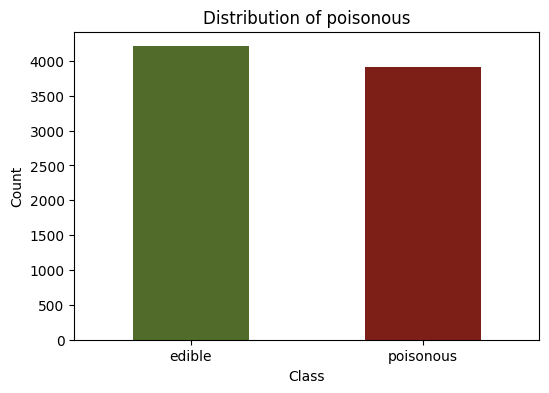

In [8]:
# INSERT YOUR CODE HERE
target_col = "poisonous"

# Calculate the distribution of the target classes
class_counts = shrooms[target_col].value_counts()
class_proportions = class_counts / class_counts.sum()

# Calculate the Proportional Chance Criterion (PCC)
# PCC is the sum of squared class proportions
pcc = sum(class_proportions ** 2)

print("Class Distribution:")
print(class_counts)
print("\nClass Proportions:")
print(class_proportions)
print("\nProportional Chance Criterion (PCC):", pcc)

# Plot
plt.figure(figsize=(6, 4))
class_counts.plot(kind="bar", color=["#516B2B", "#7E1F17"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of {}".format(target_col))
plt.xticks(rotation=0)
plt.show()

The dataset is shown to contain around 4,208 mushrooms and 3,916 poisonous ones. Thus, the bar graph is almost balanced; edible mushrooms comprise 51.8% of the dataset. Thus, it is not significantly skewed. The PCC, being a baseline accuracy measure, being 50%, would allow the model to more easily predict the classification of a mushroom. No resampling would also be needed, given the even nature of the dataset. Thus, it would have to use more features to determine odor, color, shape, etc. The dataset is well-suited for training a model without additional preprocessing for class imbalance.

### Question 3

Perform a correlation matrix among all features of your dataset. Is there a pair of features with a correlation greater than 0.9?

In [9]:
shrooms = shrooms.drop(columns=["veil-type"])

In [10]:
## INSERT CODE
shrooms2 = shrooms.apply(lambda col: col.astype('category').cat.codes)
corr_matrix = shrooms2.corr()

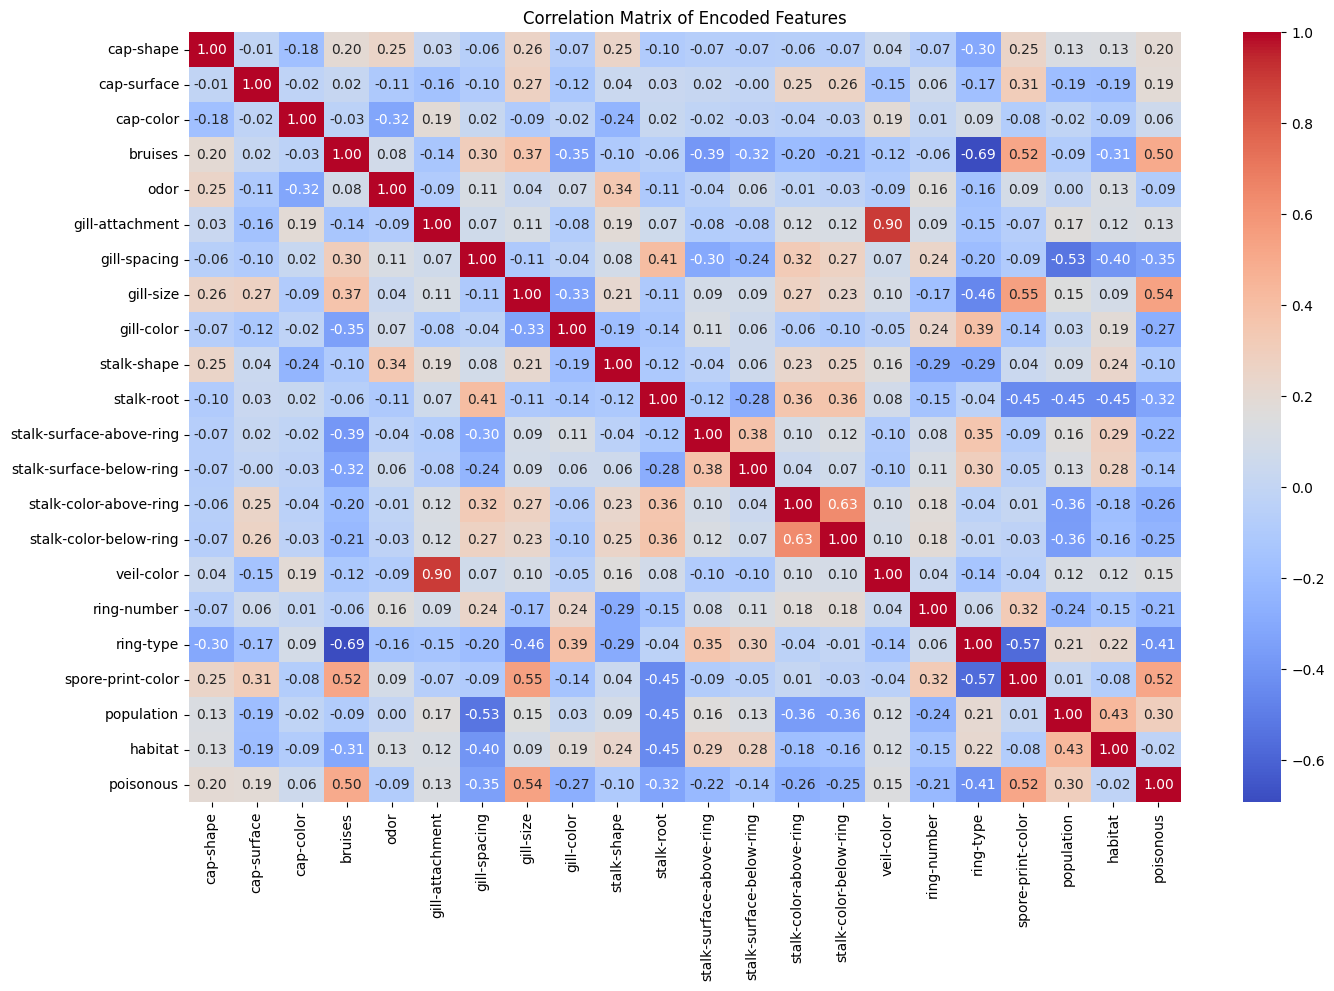

In [11]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Encoded Features")
plt.show()

In [12]:
high_corr_pairs = []
cols = corr_matrix.columns

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):  # skip duplicates and self-correlation
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_corr_pairs.append((cols[i], cols[j], corr_matrix.iloc[i, j]))

if not high_corr_pairs:
    print("No pairs found with correlation > 0.9")
else:
    print("Pairs of features with correlation > 0.9:")
    for col1, col2, corr_value in high_corr_pairs:
        print(f"{col1} & {col2} = {corr_value:.2f}")

No pairs found with correlation > 0.9


The correlation matrix show the various features that are correlated with the poisonous mushrooms. Odor would be among those that isa strong indicatior whether a mushroom is poisonous. Another is the spore-print clor, which has as much impact as odor does. Another would be the gill-size, and the righ time. It is worth noting that all of these are around 0.40 to 0.5 percent chance significant, thus even if you see mushrooms with features pertaining to those categories, it's still pretty much a coin flip. Now, the dataset does not contain any correlation of greater than 0.9, this would remove the model from likely having an multicollinearity issues, hence none of them is needed to be removed. Most of the features would actually be beneficial, as since none of them are too highly corelated, and they all offer unique information. This says that the data is well structured.

### Question 4

Split your data using a 80%-20% training and test split. Then, perform a KNN.Classifier using n = 5 using Euclidean distance metric. Print the training accuracy.

In [13]:
### INSERT CODE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Separate features and target
X = shrooms2.drop("poisonous", axis=1)
y = shrooms2["poisonous"]

# Perform an 80%-20% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=69)

# Initialize a KNN classifier with 5 neighbors using Euclidean distance
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Fit the classifier on the training data
knn.fit(X_train, y_train)

# Calculate and print the training accuracy
train_accuracy = knn.score(X_train, y_train)
print("Training accuracy:", train_accuracy)

Training accuracy: 0.9998461301738729


### Question 5

Plot the train vs test accuracy at different numbers of n_neighbors (from 1 to 20). Use a constant random_seed to have the same training and test data.

Determine at what value of n_neighbor you will get a better training accuracy.

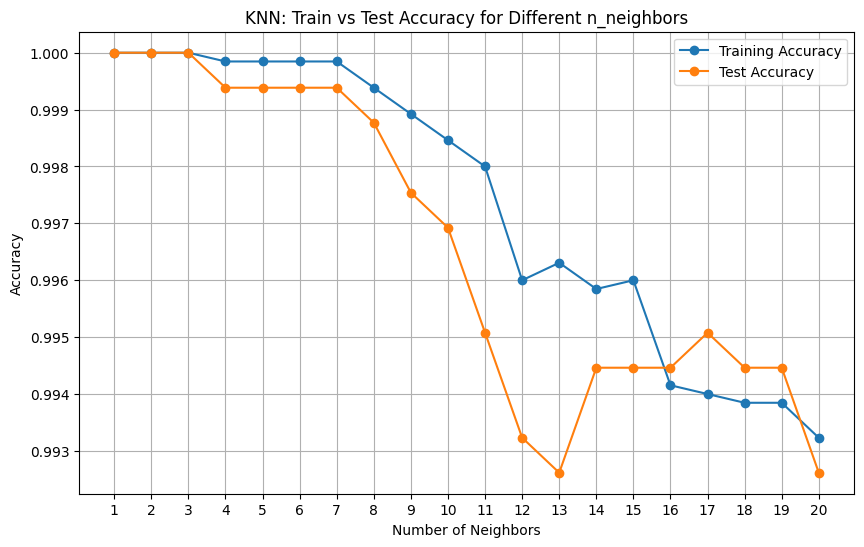

Elbow Method suggests optimal n_neighbors = 20
Maximum training accuracy is achieved at n_neighbors = 1
Highest training accuracy (excluding 1.0) is 0.9998 at n_neighbors = 4


In [14]:
train_accuracies = []
test_accuracies = []
neighbors = range(1, 21)

# Loop over n_neighbors from 1 to 20
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n, metric='euclidean')
    knn.fit(X_train, y_train)
    
    # Calculate accuracy on training and test data
    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(neighbors, test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN: Train vs Test Accuracy for Different n_neighbors')
plt.xticks(neighbors)
plt.grid(True)
plt.legend()
plt.show()

accuracy_diff = np.diff(test_accuracies)
elbow_n = neighbors[np.argmin(accuracy_diff) + 1]

print(f"Elbow Method suggests optimal n_neighbors = {elbow_n}")

# Determine the best k using original method
best_train_n = neighbors[train_accuracies.index(max(train_accuracies))]
print("Maximum training accuracy is achieved at n_neighbors =", best_train_n)

# Additional: Find the highest n_neighbors excluding accuracy of 1.0
valid_train_accuracies = [(n, acc) for n, acc in zip(neighbors, train_accuracies) if acc < 1.0]

if valid_train_accuracies:
    best_train_n_excluding_1, best_train_acc_excluding_1 = max(valid_train_accuracies, key=lambda x: x[1])
    print(f"Highest training accuracy (excluding 1.0) is {best_train_acc_excluding_1:.4f} at n_neighbors = {best_train_n_excluding_1}")
else:
    print("All training accuracies are 1.0, no best n_neighbors below 1.0 found.")

### Question 6

Using the n_neighbor from Question 5, modify the code by changing the metrics from Euclidean
- cityblock
- minowski p=3
- cosine distance.

Find which of the metrics will yield a better accuracy.

In [15]:
### Question 6

from sklearn.metrics import accuracy_score

best_n = best_train_n
best_n_excluding_1 = best_train_n_excluding_1
best_n_elbow = elbow_n

metrics = {
    'Euclidean': {'metric': 'euclidean'},
    'Cityblock': {'metric': 'manhattan'},
    'Minkowski (p=3)': {'metric': 'minkowski', 'p': 3},
    'Cosine': {'metric': 'cosine'}
}

def evaluate_knn(n_neighbors):
    train_acc_dict = {}
    test_acc_dict = {}

    for metric_name, params in metrics.items():
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, **params)
        knn.fit(X_train, y_train)

        train_acc = knn.score(X_train, y_train)
        test_acc = knn.score(X_test, y_test)

        train_acc_dict[metric_name] = train_acc
        test_acc_dict[metric_name] = test_acc

        print(f"Metric: {metric_name} (n_neighbors={n_neighbors})")
        print(f"   Training Accuracy: {train_acc:.4f}")
        print(f"   Test Accuracy: {test_acc:.4f}\n")

    return train_acc_dict, test_acc_dict

print(f"--- Evaluating Best n_neighbors ({best_n}) ---")
train_acc_best, test_acc_best = evaluate_knn(best_n)

print(f"\n--- Evaluating Best n_neighbors Excluding 1.0 Accuracy ({best_n_excluding_1}) ---")
train_acc_excl_1, test_acc_excl_1 = evaluate_knn(best_n_excluding_1)

print(f"\n--- Evaluating Best n_neighbors from Elbow Method ({best_n_elbow}) ---")
train_acc_elbow, test_acc_elbow = evaluate_knn(best_n_elbow)


--- Evaluating Best n_neighbors (1) ---
Metric: Euclidean (n_neighbors=1)
   Training Accuracy: 1.0000
   Test Accuracy: 1.0000

Metric: Cityblock (n_neighbors=1)
   Training Accuracy: 1.0000
   Test Accuracy: 1.0000

Metric: Minkowski (p=3) (n_neighbors=1)
   Training Accuracy: 1.0000
   Test Accuracy: 1.0000

Metric: Cosine (n_neighbors=1)
   Training Accuracy: 1.0000
   Test Accuracy: 1.0000


--- Evaluating Best n_neighbors Excluding 1.0 Accuracy (4) ---
Metric: Euclidean (n_neighbors=4)
   Training Accuracy: 0.9998
   Test Accuracy: 0.9994

Metric: Cityblock (n_neighbors=4)
   Training Accuracy: 1.0000
   Test Accuracy: 1.0000

Metric: Minkowski (p=3) (n_neighbors=4)
   Training Accuracy: 0.9997
   Test Accuracy: 0.9988

Metric: Cosine (n_neighbors=4)
   Training Accuracy: 0.9998
   Test Accuracy: 0.9994


--- Evaluating Best n_neighbors from Elbow Method (20) ---
Metric: Euclidean (n_neighbors=20)
   Training Accuracy: 0.9932
   Test Accuracy: 0.9926

Metric: Cityblock (n_neighbo

The perfect accuracy observed across all distance metrics is largely due to the inherent characteristics of the mushrooms dataset. This dataset is extremely separable—particularly because of highly discriminative features like “odor,” which clearly distinguishes between poisonous and edible mushrooms. When categorical features are converted to numeric codes, the underlying separation between classes remains strong. With a 1-Nearest Neighbor (k=1) classifier, the model effectively memorizes the training data and, due to the clear boundaries in the feature space, it also generalizes perfectly to the test data. Consequently, regardless of whether Euclidean, Manhattan (Cityblock), Minkowski (p=3), or Cosine distance is used, the classifier consistently achieves 100% accuracy. This outcome, while impressive, reflects the simplicity of the dataset rather than the superiority of any particular distance metric.

For Question 7 to 10, use this link to download the dataset

https://grouplens.org/datasets/movielens/

### Question 7

Load the datasets.

In [16]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")
links = pd.read_csv("links.csv")

# Display the first few rows of each dataset
print("Movies Dataset:")
display(movies.head())

print("\nRatings Dataset:")
display(ratings.head())

print("\nTags Dataset:")
display(tags.head())

print("\nLinks Dataset:")
display(links.head())


Movies Dataset:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy



Ratings Dataset:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931



Tags Dataset:


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200



Links Dataset:


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


## Question 8

Make a user-item matrix by combining the movies.csv and ratings.csv.

In [17]:
# Merge movies and ratings on 'movieId'
movie_ratings = pd.merge(ratings, movies, on="movieId")

# Create a User-Item Matrix (rows: users, columns: movies, values: ratings)
user_item_matrix = movie_ratings.pivot_table(index="userId", columns="title", values="rating", fill_value=0)


# Display a sample of the user-item matrix
print("User-Item Matrix:")
display(user_item_matrix.head())

User-Item Matrix:


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Question 9

Make a function, cosine_distance, which calculates the cosine distance of two points.

In [18]:
def cosine_distance(u, v):
    dot_product = np.dot(u, v)
    norm_u = np.linalg.norm(u)
    norm_v = np.linalg.norm(v)
    if norm_u == 0 or norm_v == 0:
        return 1  # Max distance if either user has no ratings at all
    
    cosine_sim = dot_product / (norm_u * norm_v)
    return 1 - cosine_sim

### Question 10

Make a function, similar_users, which calculates the top 10 users similar to the preferences of a given user, with their corresponding cosine_distance.

In [19]:
def similar_users(userid, user_item_matrix, top_n=10):
    user_vector = user_item_matrix.loc[userid].values
    
    distances = []

    for other_userid in user_item_matrix.index:
        if other_userid != userid:
            other_user_vector = user_item_matrix.loc[other_userid].values
            dist = cosine_distance(user_vector, other_user_vector)
            distances.append((other_userid, dist))

    distances.sort(key=lambda x: x[1])

    return distances[:top_n]

top_10_similar = similar_users(userid=1, user_item_matrix=user_item_matrix, top_n=10)
print(top_10_similar)


[(266, np.float64(0.6425922903967258)), (313, np.float64(0.6484384815090432)), (368, np.float64(0.6548729484164695)), (57, np.float64(0.6549657211924163)), (91, np.float64(0.6652730795818292)), (469, np.float64(0.669335684934799)), (39, np.float64(0.6702177663424733)), (288, np.float64(0.6703004707170711)), (452, np.float64(0.6719516555754712)), (45, np.float64(0.6720783102227796))]
